In [1]:
import os
from mu2e import mu2e_ext_path
from mu2e.dataframeprod import DataFrameMaker
from mu2e.mu2eplots import mu2e_plot, mu2e_plot3d
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)
from skhep.visual import MplPlotter as splt
from copy import deepcopy
from lmfit import Model, Parameters, report_fit

/usr/local/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning:

The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.

/usr/local/lib/python3.6/site-packages/plotly/widgets/graph_widget.py:13: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



<IPython.core.display.Javascript object>

# 8 Slice

0
(100, 10)
375.0
2450.0
0.007567867
2260634    0.007568
Name: Br, dtype: float64
0.463648
(100, 10)
335.410196625
2450.0
0.0068355
2156039    0.006836
Name: Br, dtype: float64
0.7853981633974483
(100, 10)
353.553390593
2450.0
0.007200531
2086309    0.007201
Name: Br, dtype: float64
1.107149
(100, 10)
335.410196625
2450.0
0.006860803
1944647    0.006861
Name: Br, dtype: float64
1.5707963267948966
(100, 10)
375.0
2450.0
0.007624567
1732154    0.007625
Name: Br, dtype: float64
2.034444
(100, 10)
335.410196625
2450.0
0.006857481
1517459    0.006857
Name: Br, dtype: float64
2.356194490192345
(100, 10)
353.553390593
2450.0
0.007196113
1374329    0.007196
Name: Br, dtype: float64
2.677945
(100, 10)
335.410196625
2450.0
0.006832011
1301663    0.006832
Name: Br, dtype: float64
fitting with n=20, m=11, cn=0, cm=0
Elapsed time was 447.516 seconds
[[Fit Statistics]]
    # function evals   = 27
    # data points      = 24000
    # variables        = 418
    chi-square         = 0.000
    reduced c

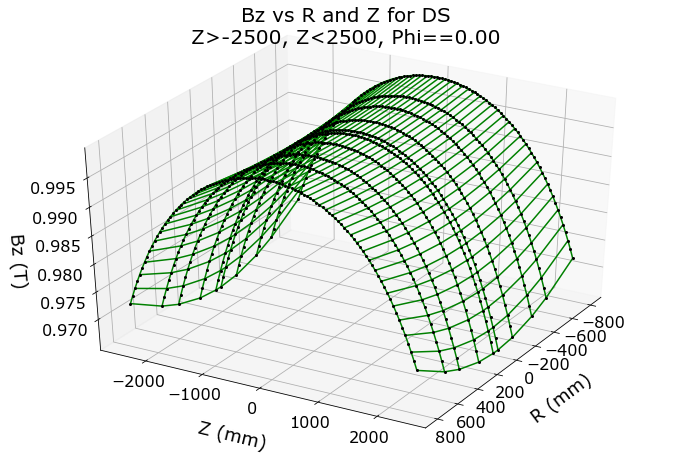

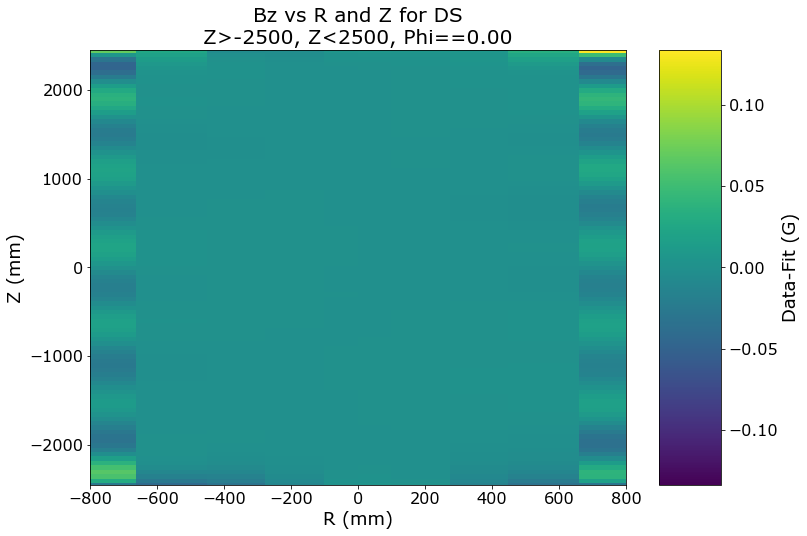

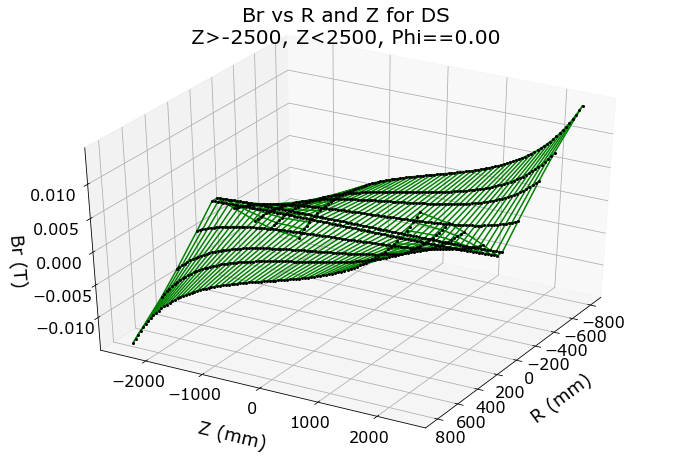

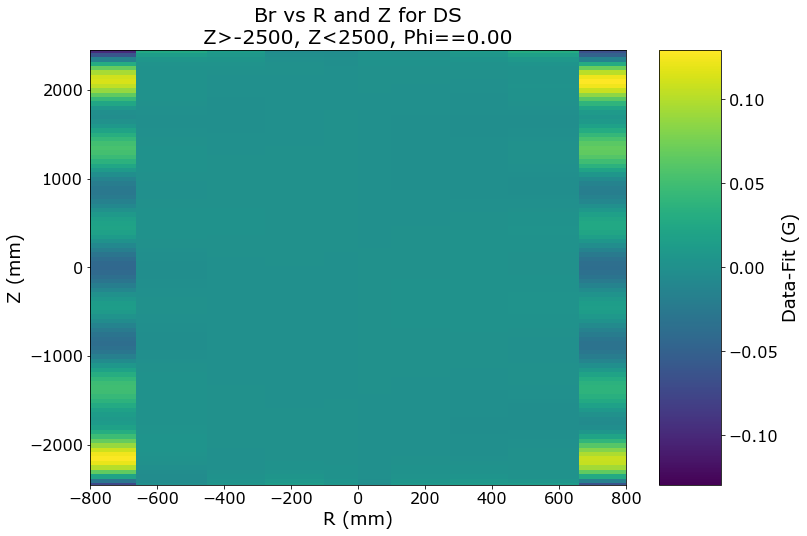

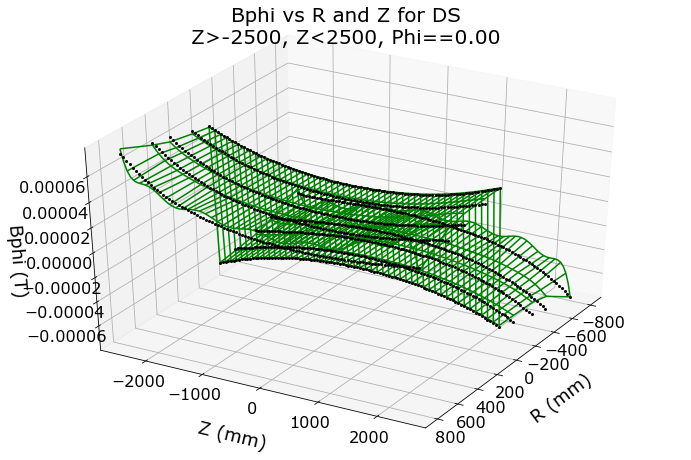

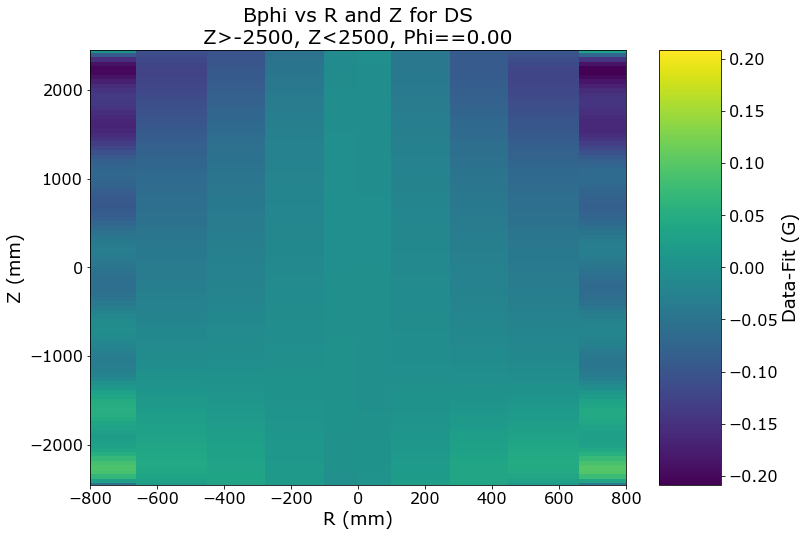

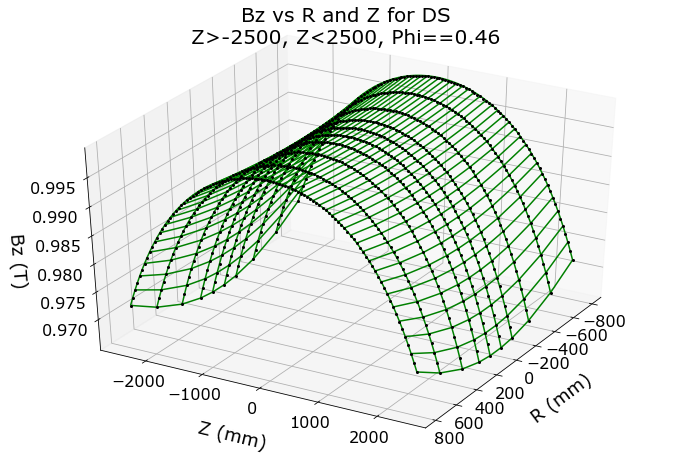

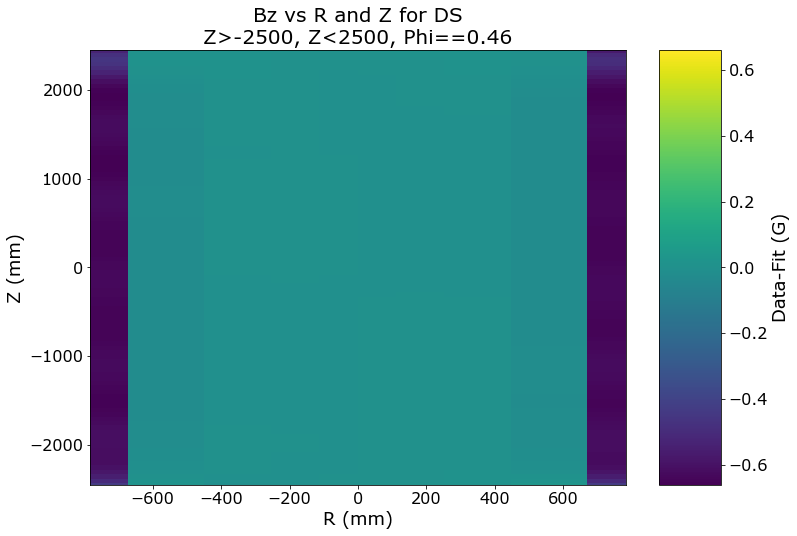

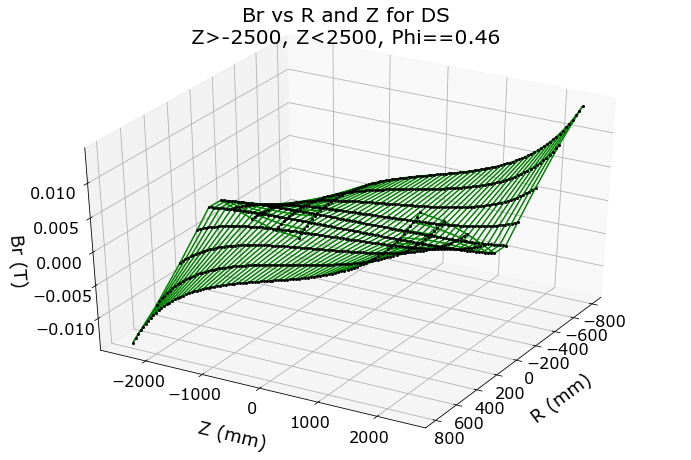

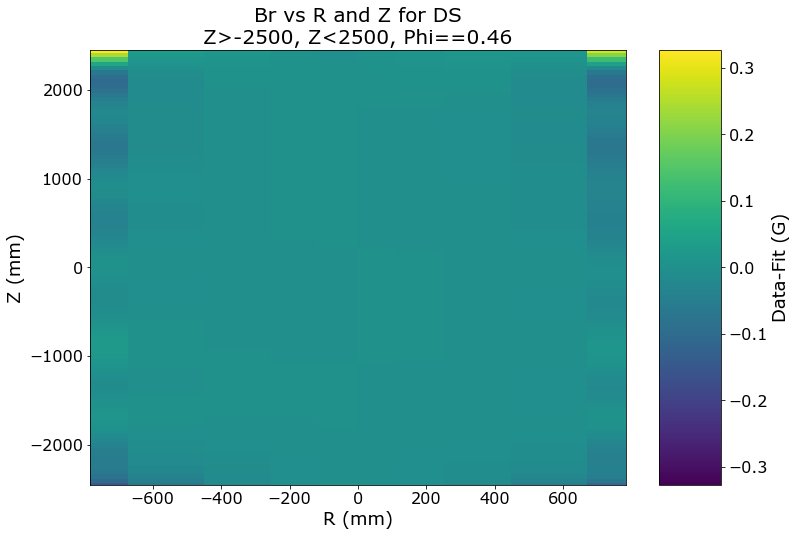

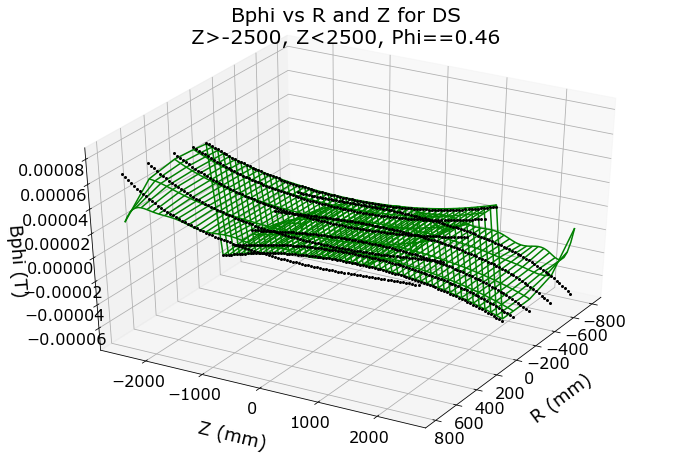

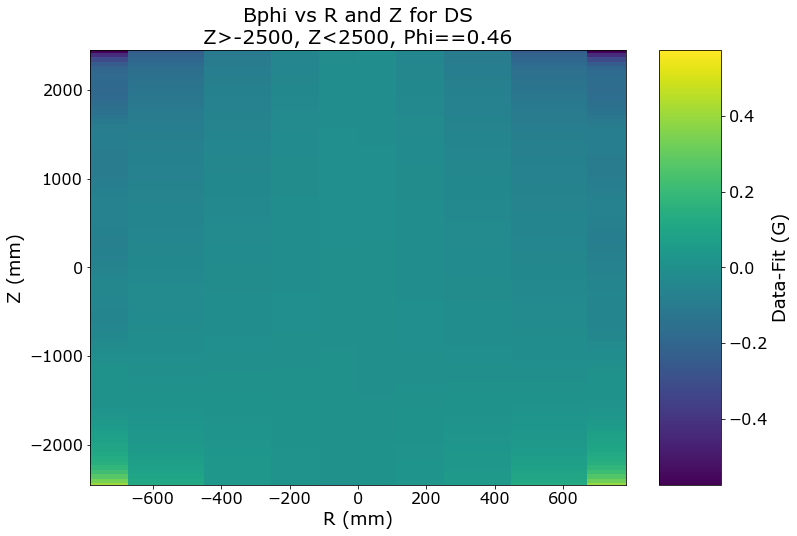

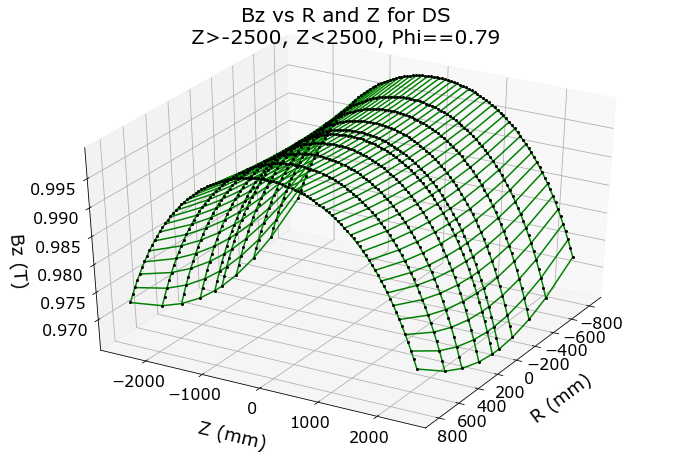

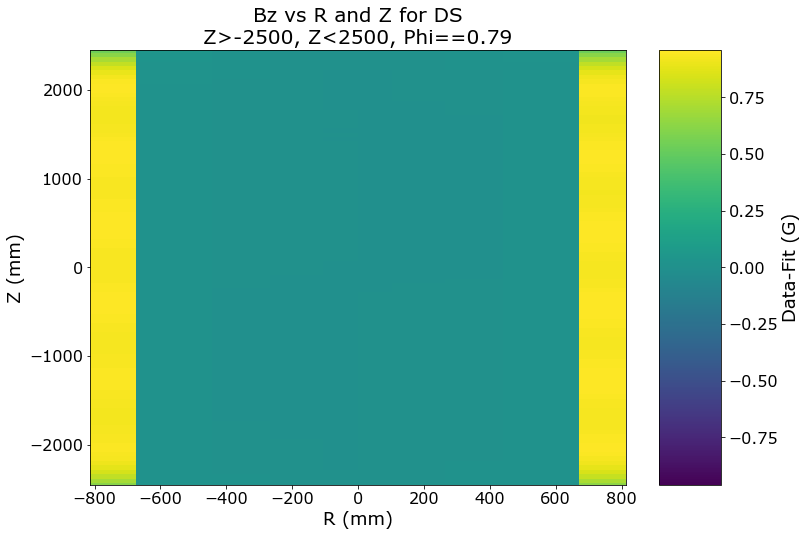

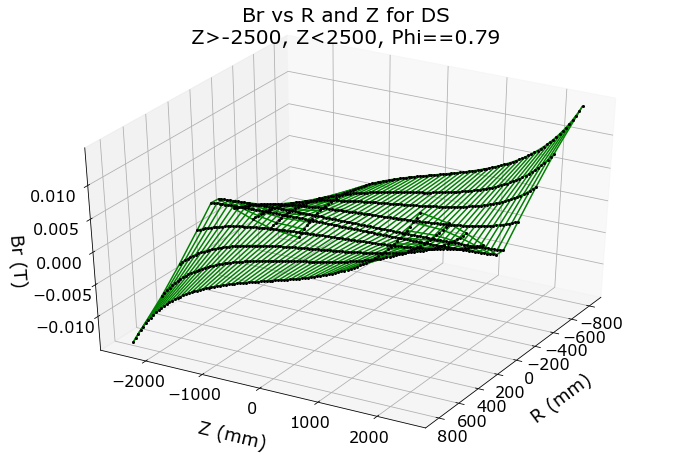

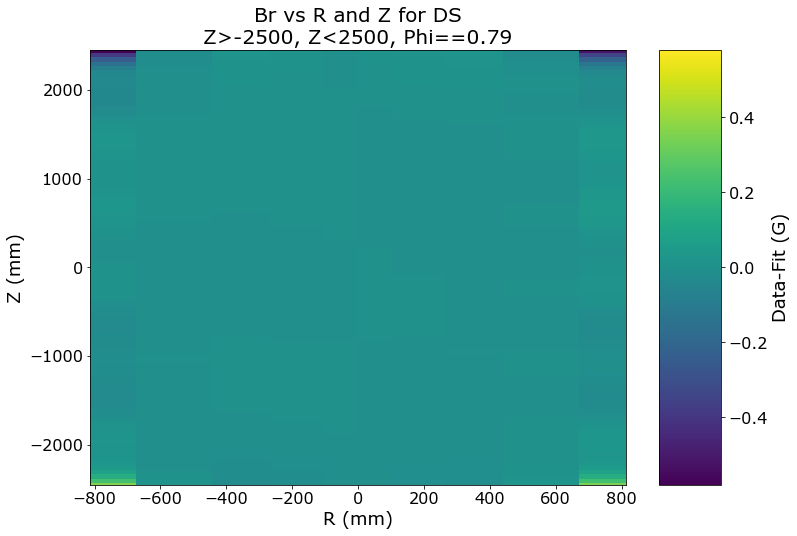

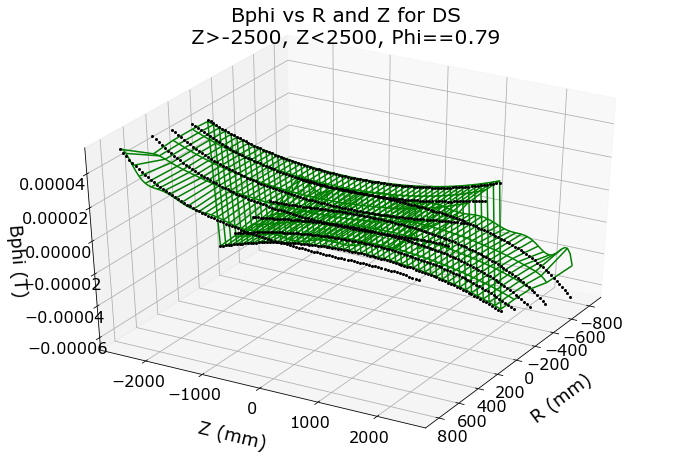

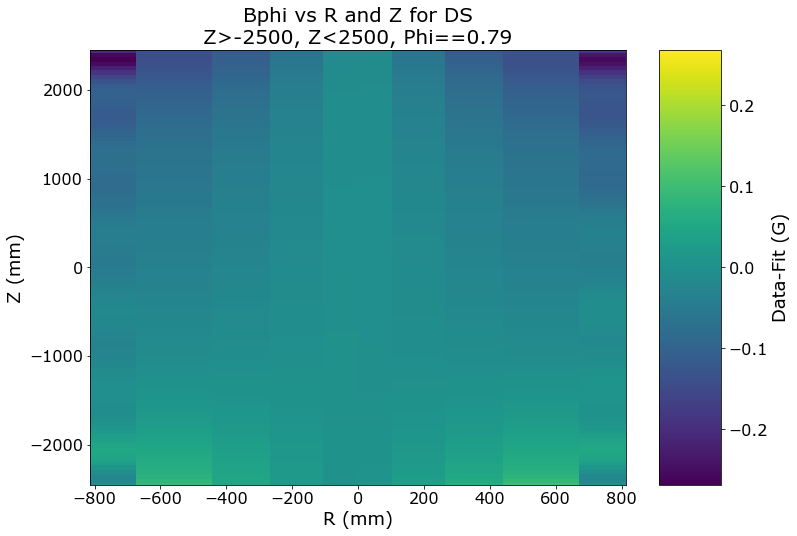

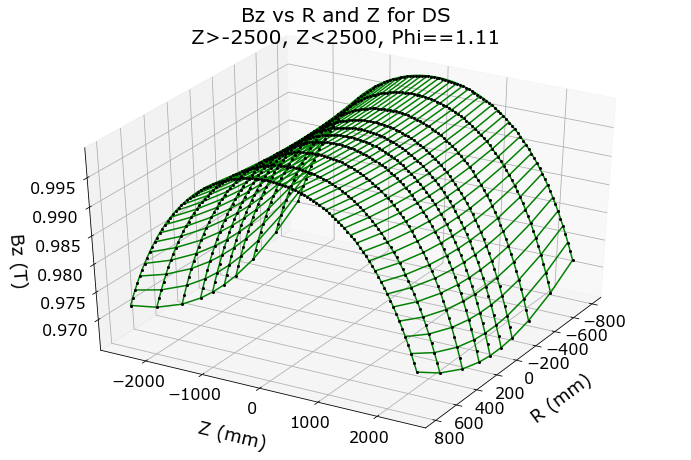

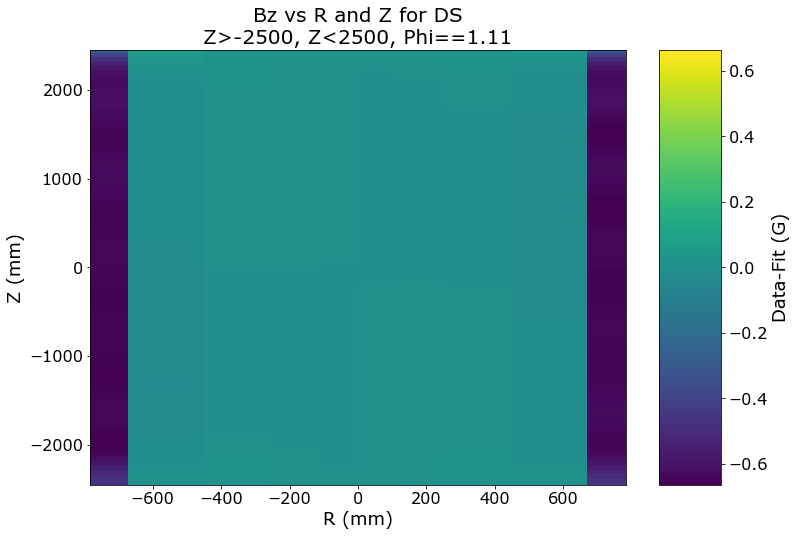

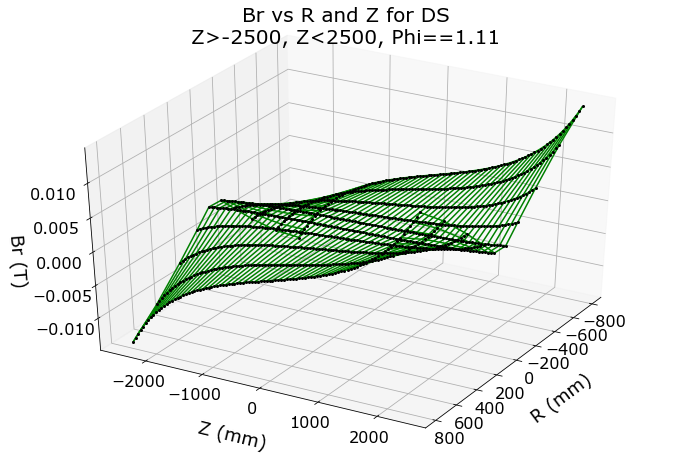

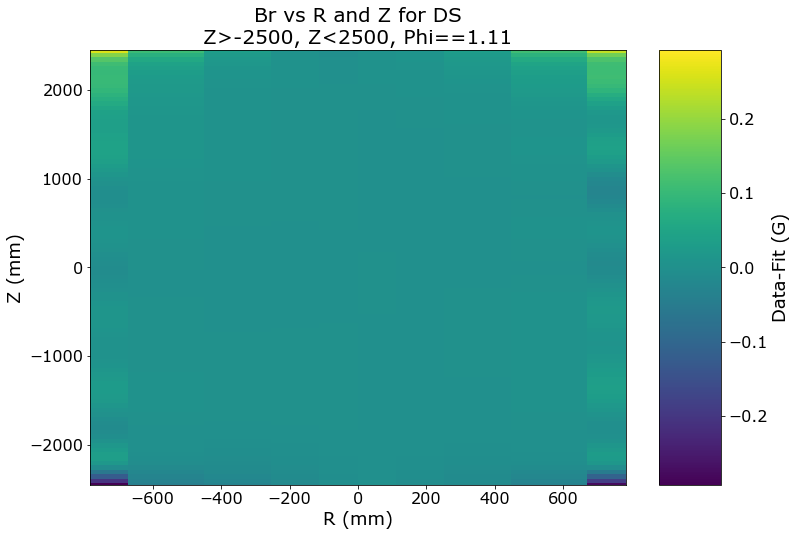

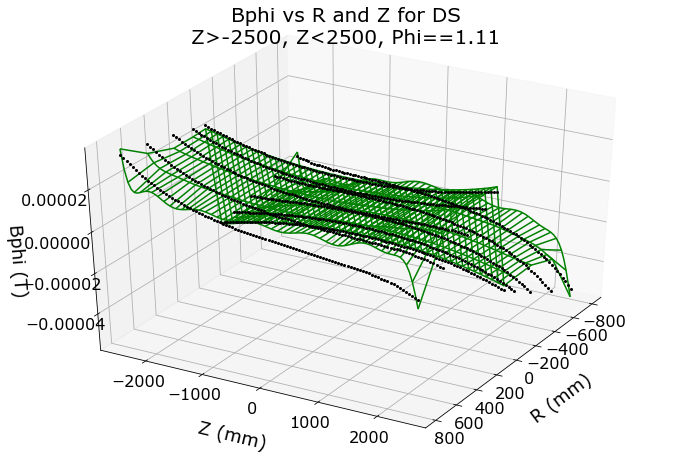

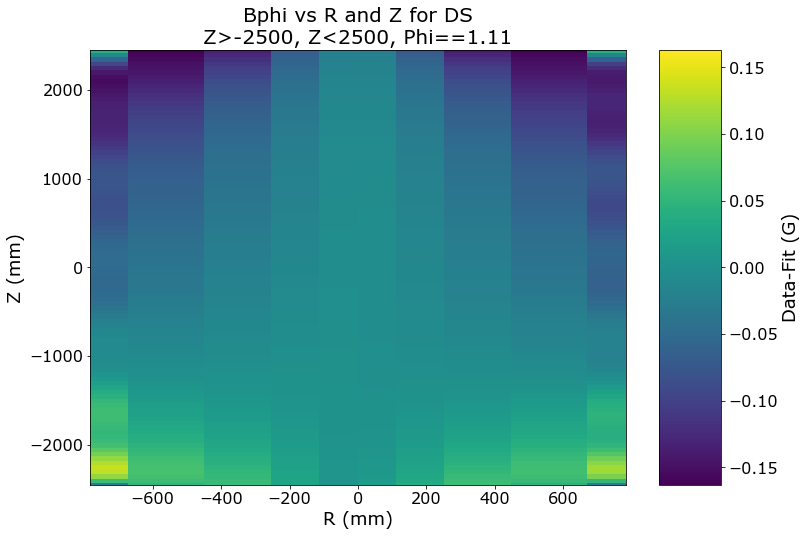

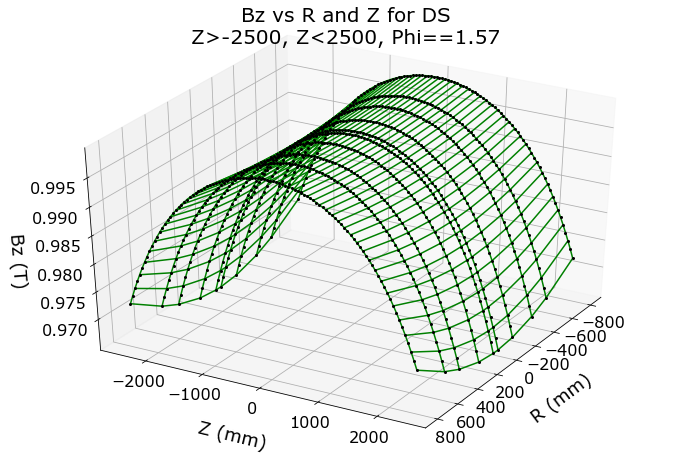

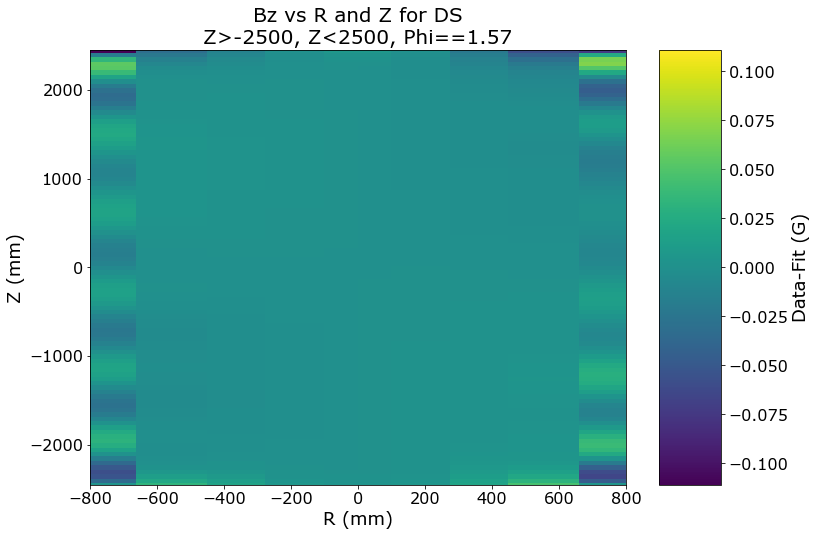

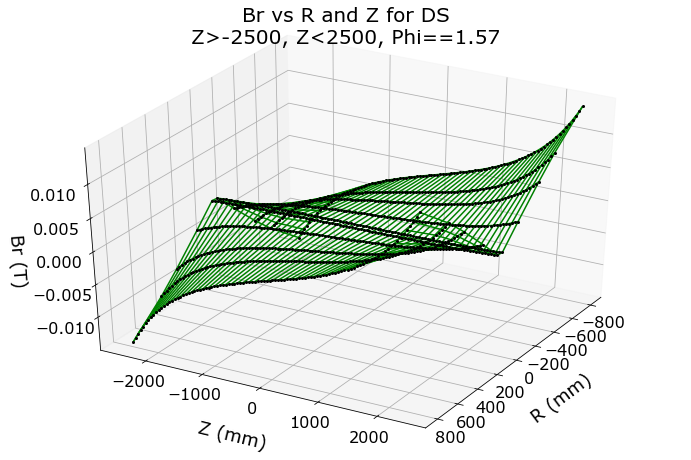

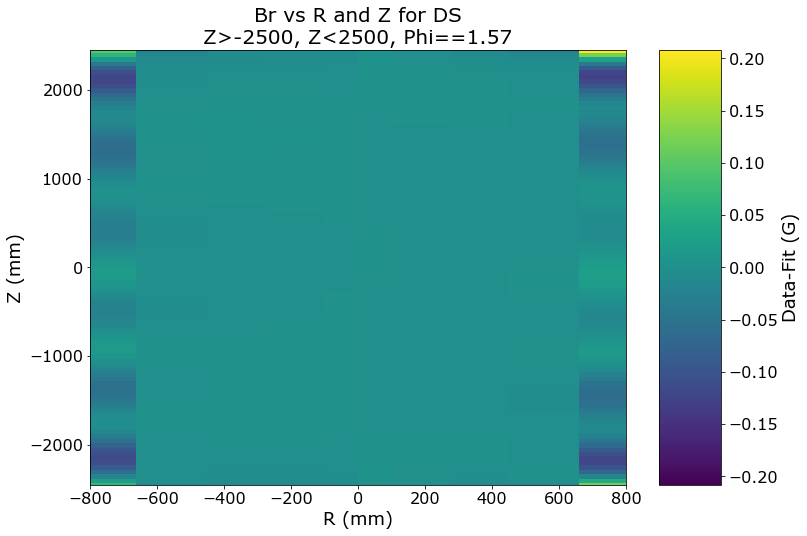

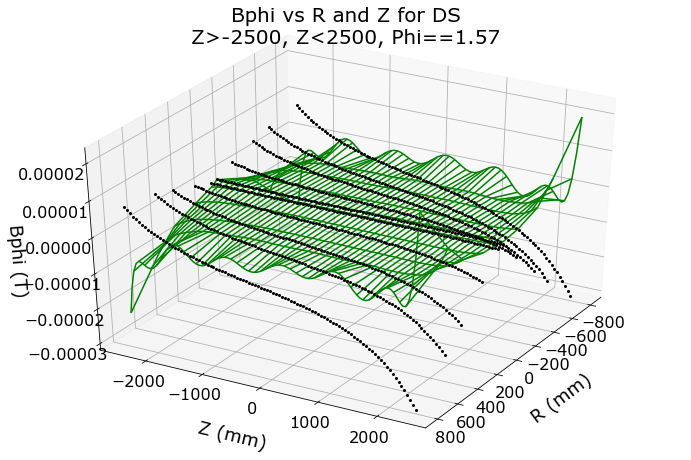

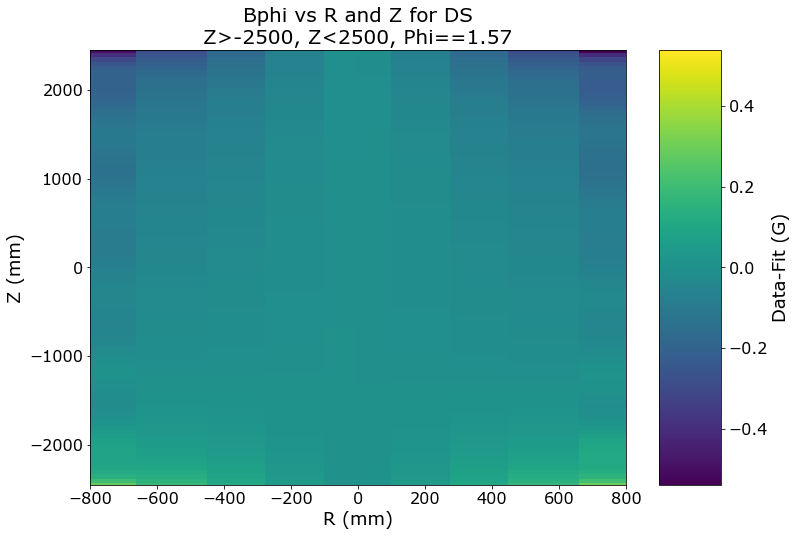

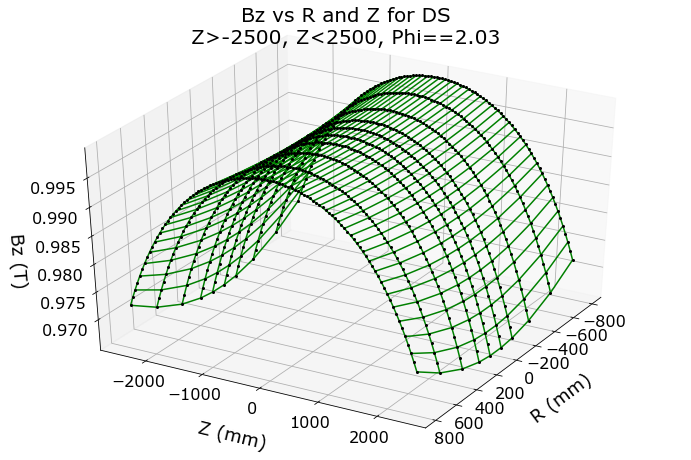

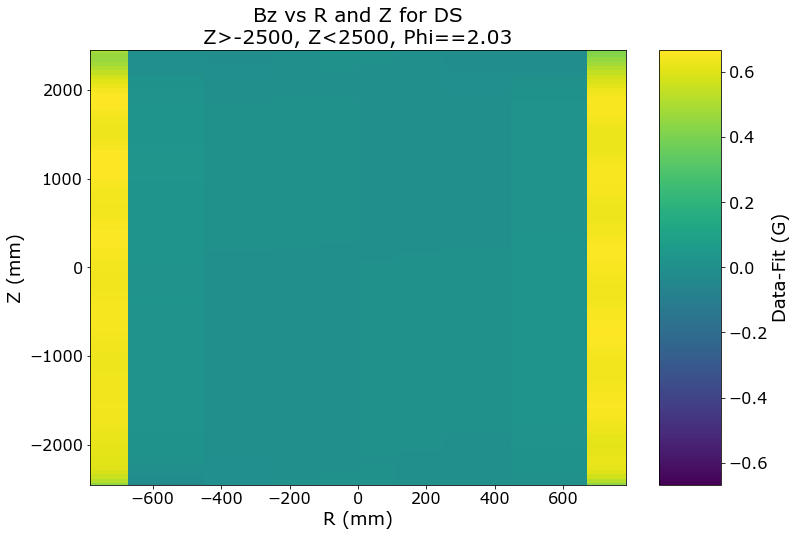

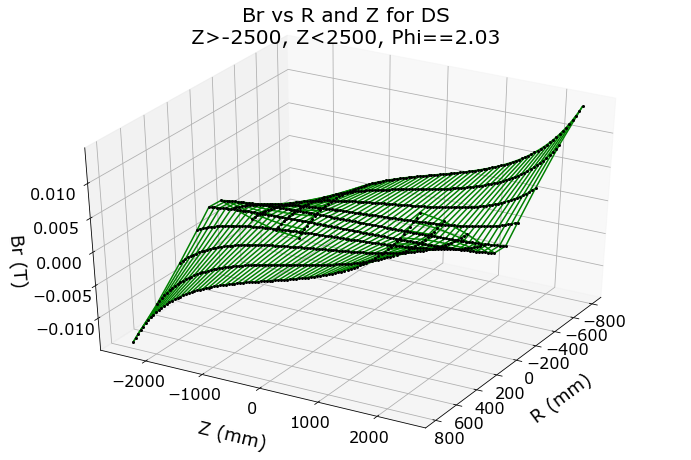

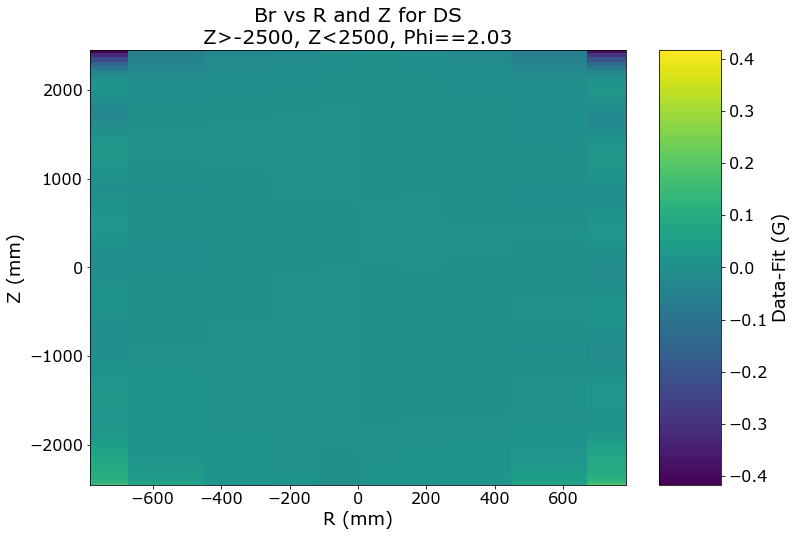

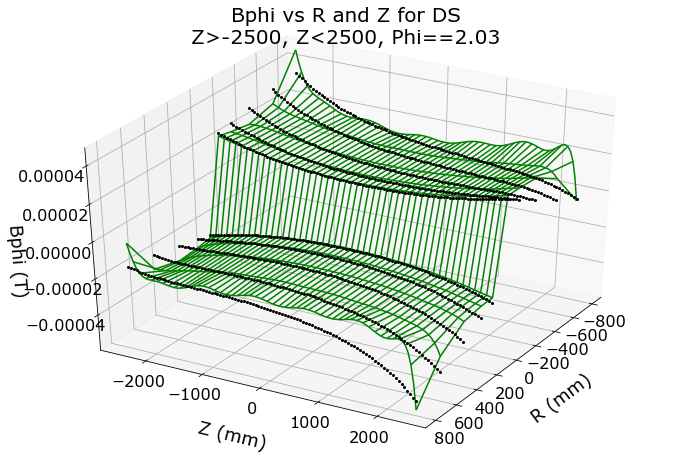

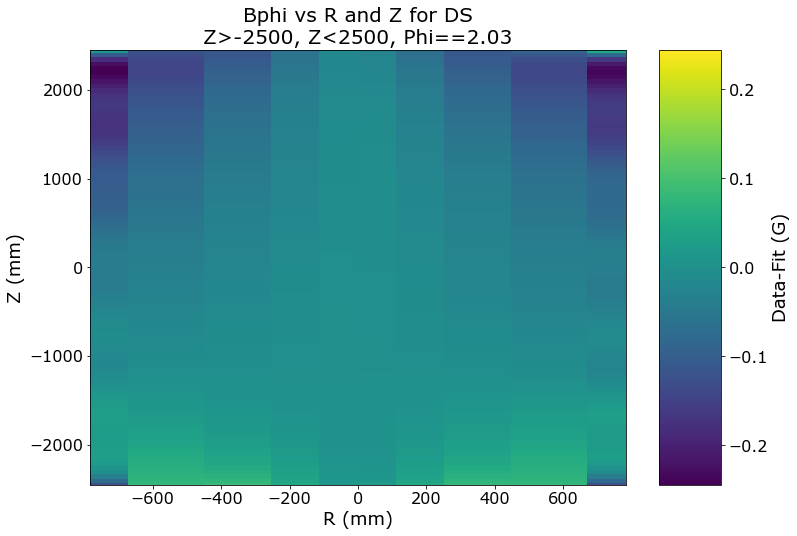

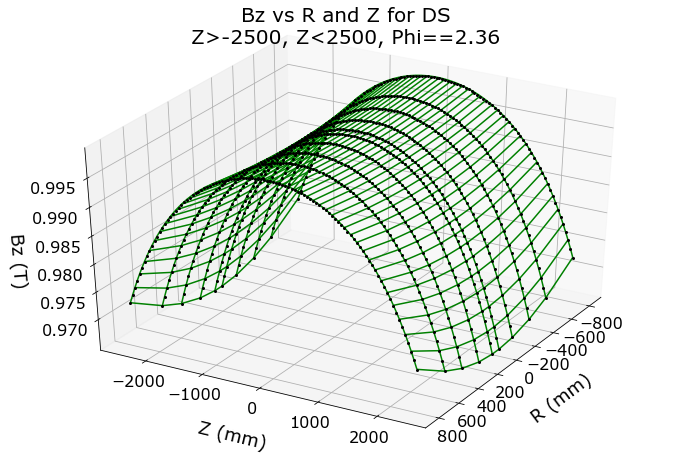

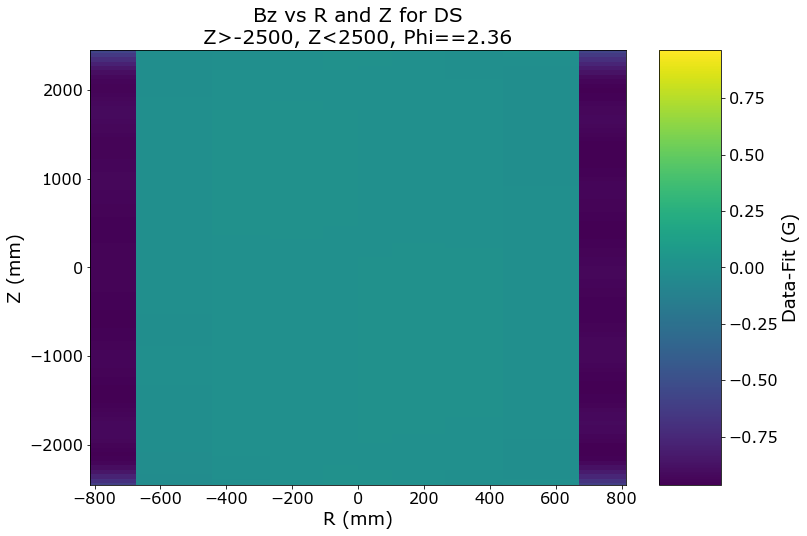

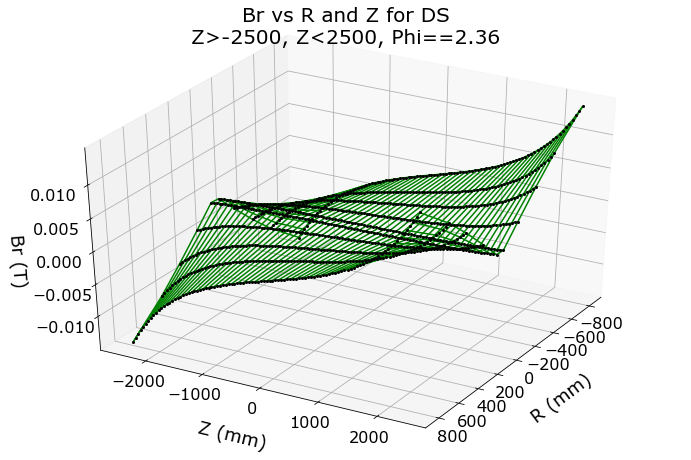

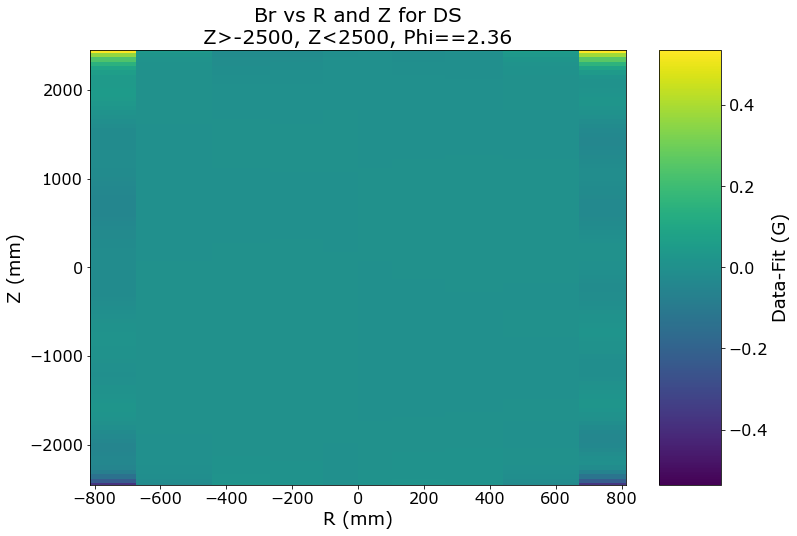

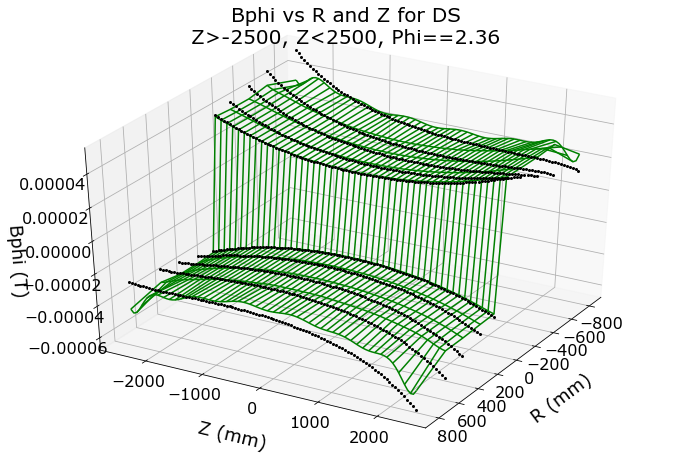

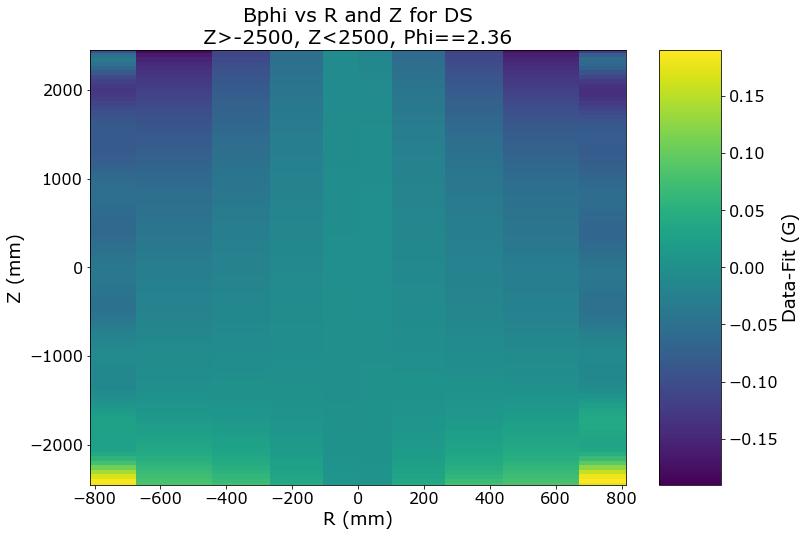

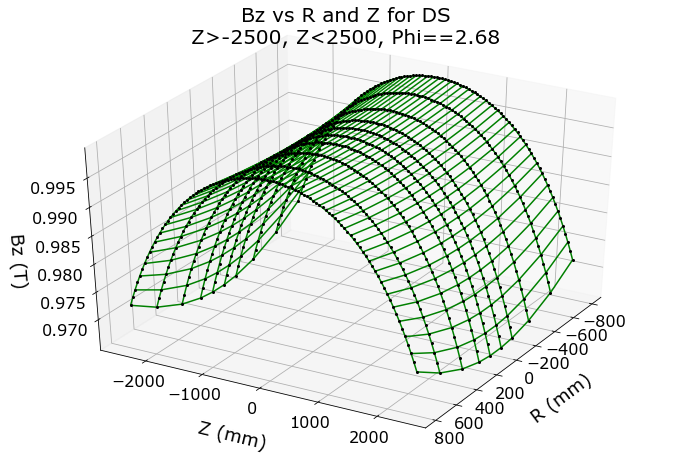

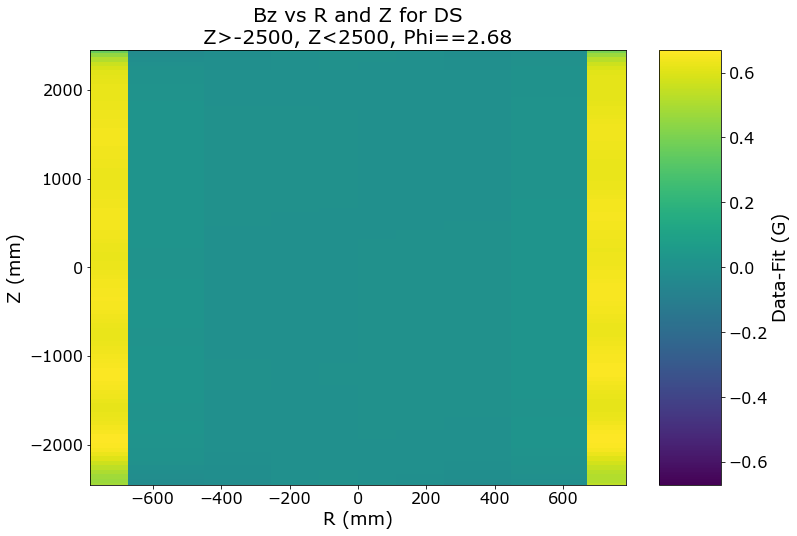

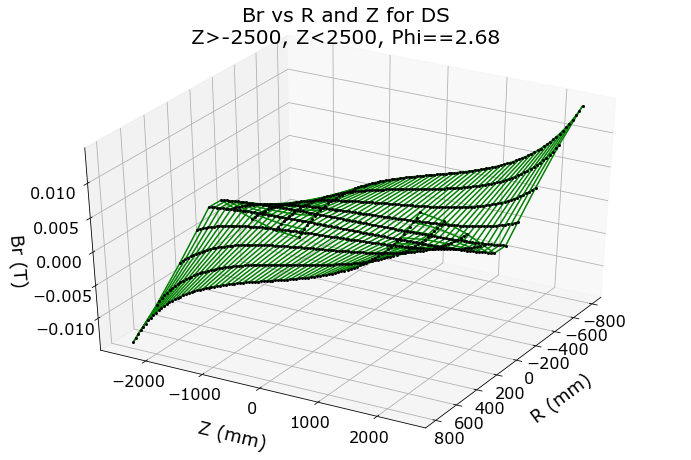

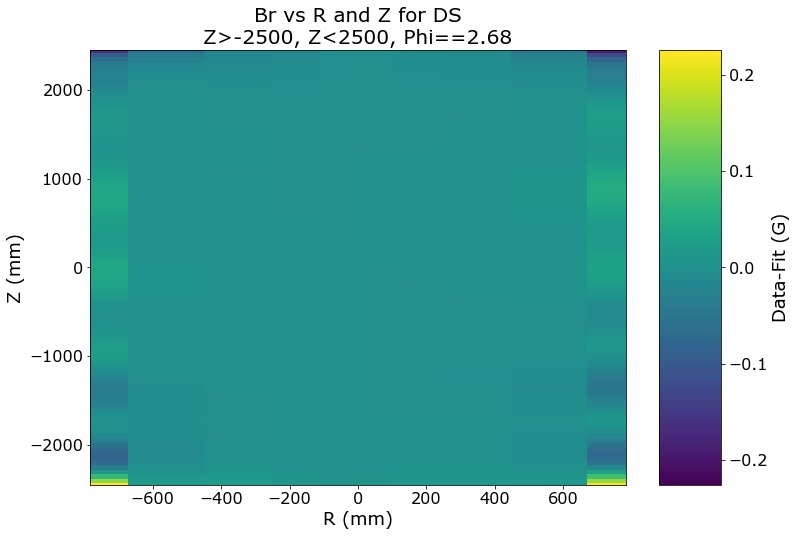

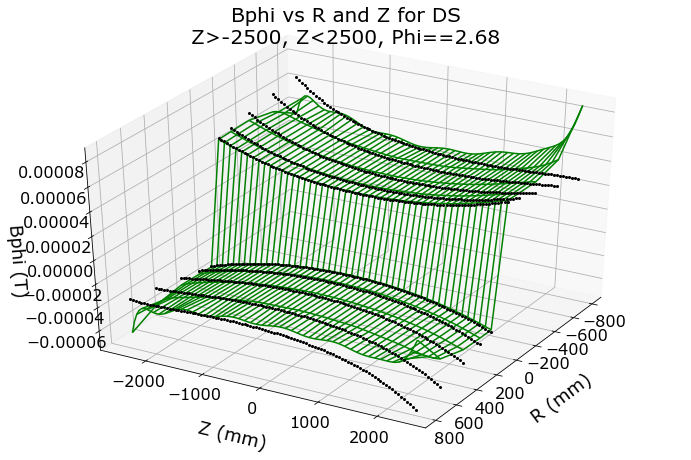

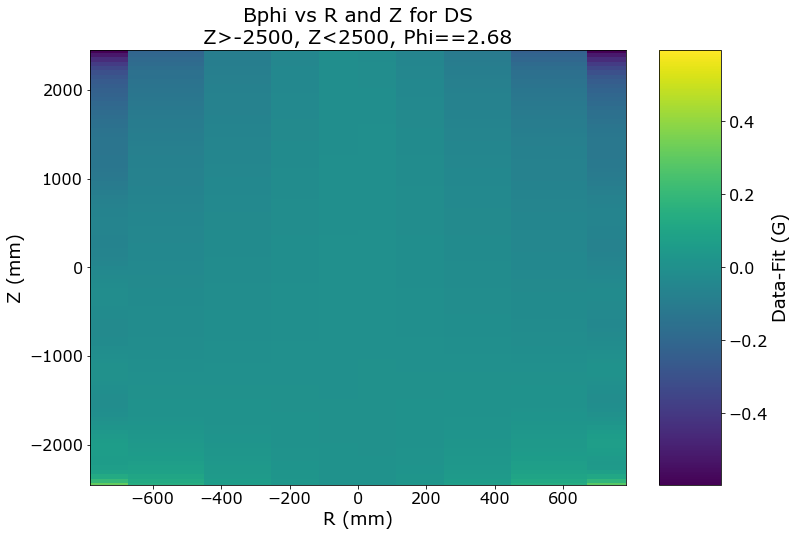

In [25]:
run hallprobesim.py

In [26]:
ff1 = deepcopy(ff)

In [27]:
labs=[i[2:] for i in ff1.params if ('A' in i and ff1.params[i].vary==True and i.split('_')[1] != '0')]

As_1=[ff1.params[i].value for i in ff1.params if ('A' in i and ff1.params[i].vary==True and i.split('_')[1] != '0')]

Bs_1=[ff1.params[i].value for i in ff1.params if ('B' in i and ff1.params[i].vary==True and i.split('_')[1] != '0')]

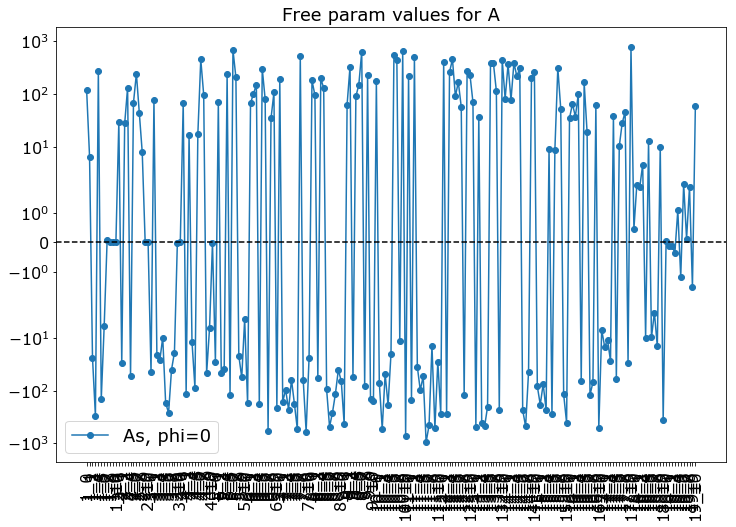

In [28]:
_ = plt.plot(range(len(As_1)),As_1, 'o-', label='As, phi=0')
_ = plt.axhline(0,0, 1, linestyle='--', color='k')

_ = plt.xticks(range(len(As_1)), labs, rotation='vertical')
plt.yscale('symlog')
plt.legend()
plt.title('Free param values for A')

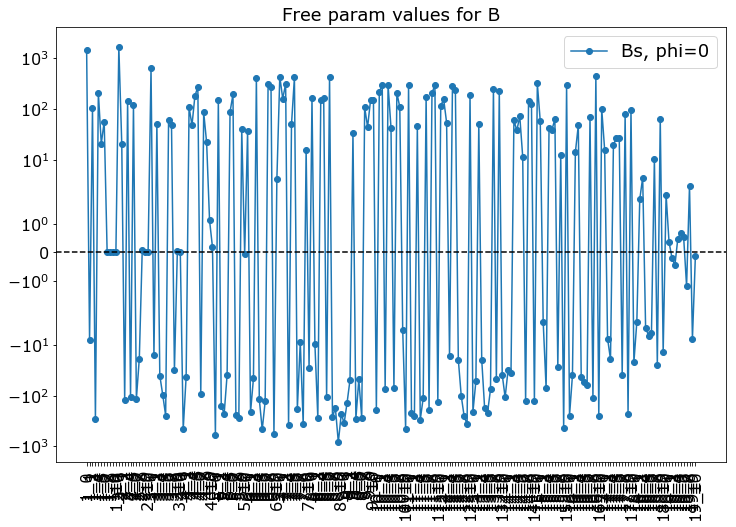

In [29]:
_ = plt.plot(range(len(Bs_1)),Bs_1, 'o-', label='Bs, phi=0')
_ = plt.axhline(0,0, 1, linestyle='--', color='k')


_ = plt.xticks(range(len(Bs_1)), labs, rotation='vertical')
plt.yscale('symlog')
plt.legend()
plt.title('Free param values for B')

In [30]:
ns = ff1.params['ns'].value
ks = ff1.params['ms'].value
k,n = np.meshgrid(range(ks+1),range(ns+1))
Ank = np.asarray([ff1.params[i] for i in ff1.params if 'A' in i]).reshape(ns,ks)
Bnk = np.asarray([ff1.params[i] for i in ff1.params if 'B' in i]).reshape(ns,ks)
AB_comb = Ank**2+Bnk**2

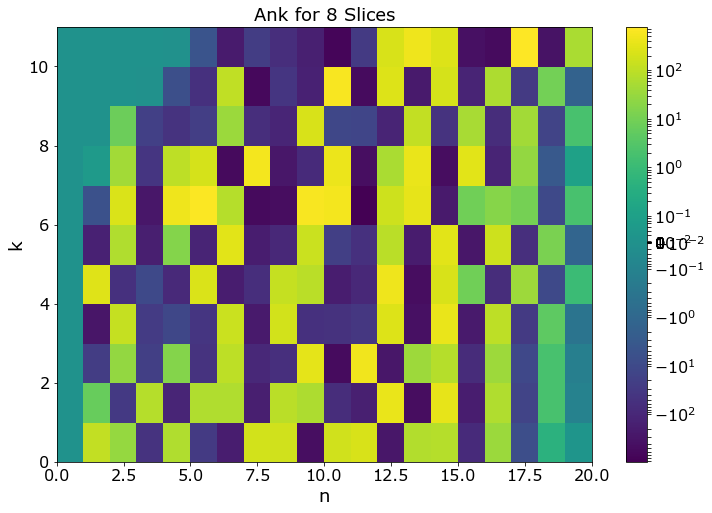

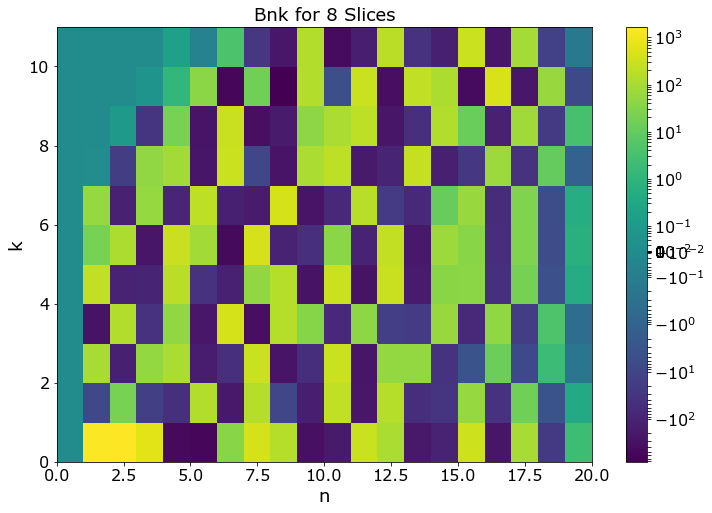

In [31]:
import matplotlib.colors as colors
plt.pcolor(n,k, Ank,
          norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=Ank.min(), vmax=Ank.max()))
plt.colorbar()
plt.title('Ank for 8 Slices')
plt.xlabel('n')
plt.ylabel('k')
plt.figure()
plt.pcolor(n,k, Bnk,
          norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=Bnk.min(), vmax=Bnk.max()))
plt.colorbar()
plt.title('Bnk for 8 Slices')
plt.xlabel('n')
plt.ylabel('k')

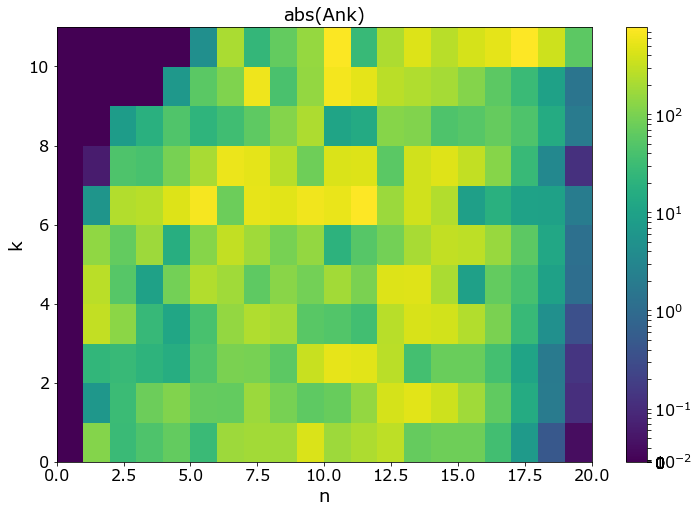

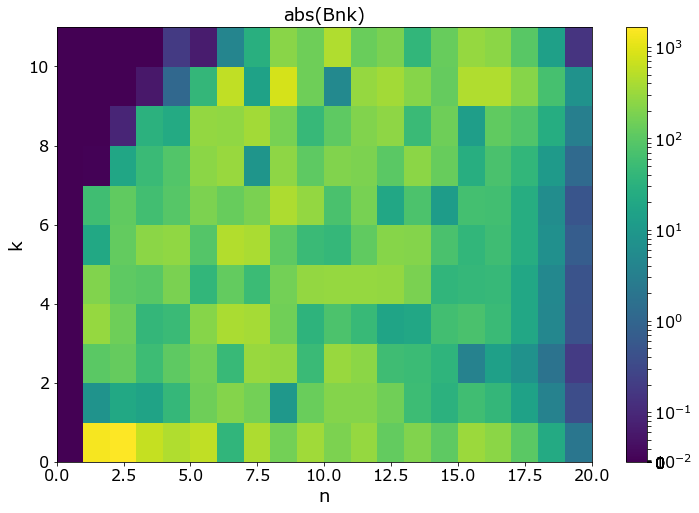

In [32]:
import matplotlib.colors as colors
plt.pcolor(n,k, abs(Ank),
          norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=0, vmax=Ank.max()))
plt.colorbar()
plt.title('abs(Ank)')
plt.xlabel('n')
plt.ylabel('k')
plt.figure()
plt.pcolor(n,k, abs(Bnk),
          norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=0, vmax=Bnk.max()))
plt.colorbar()
plt.title('abs(Bnk)')
plt.xlabel('n')
plt.ylabel('k')

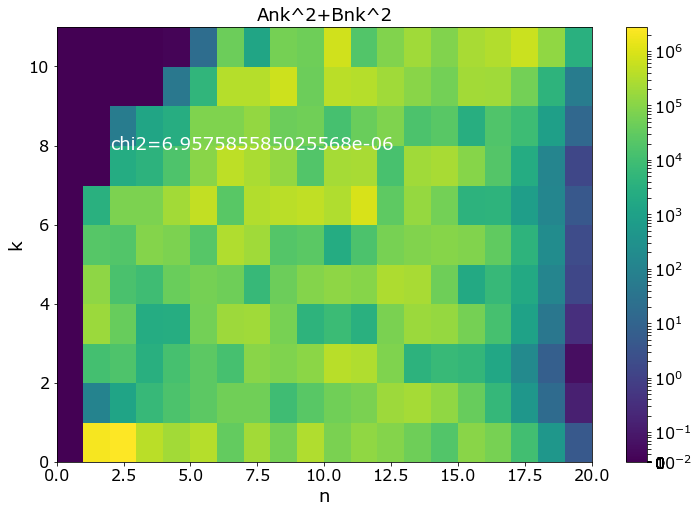

In [33]:
import matplotlib.colors as colors
plt.pcolor(n,k, AB_comb,
          norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=AB_comb.min(), vmax=AB_comb.max()))
plt.colorbar()
plt.title('Ank^2+Bnk^2')
plt.xlabel('n')
plt.ylabel('k')
ax = plt.gca()
ax.text(0.1, 0.75, f'chi2={ff1.result.chisqr}',
        horizontalalignment='left',
        verticalalignment='top',
        color='white',
        fontsize=18,
        transform=ax.transAxes)

In [70]:
ff1.result.chisqr

0.0011895738168630936